In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
df_IR =  pd.read_excel("IR Data.xlsx") 
df_IR

,Tenor,Product,Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,6m,LIBOR,0.0250,NaN,Day Count Convention,30/360
1,1y,IRS,0.0280,NaN,Fixed Leg Freq,Semi-annual
2,2y,IRS,0.0300,NaN,Floating Leg Freq,Semi-annual
3,3y,IRS,0.0315,NaN,NaN,NaN
4,4y,IRS,0.0325,NaN,NaN,NaN
5,5y,IRS,0.0330,NaN,NaN,NaN
6,7y,IRS,0.0350,NaN,NaN,NaN
7,10y,IRS,0.0370,NaN,NaN,NaN
8,15y,IRS,0.0400,NaN,NaN,NaN
9,20y,IRS,0.0450,NaN,NaN,NaN


In [3]:
# new_data = {'Tenor': '6y', 'Product': 'IRS', 'Rate': (0.0330 + 0.0350) / 2,
#             'Unnamed: 3': np.nan, 'Unnamed: 4': np.nan, 'Unnamed: 5': np.nan}
# df_IR = pd.concat([df_IR, pd.DataFrame([new_data])], ignore_index=True)
# df_IR

In [4]:
df_IR['year'] = 0
df_IR['year'][0] = 0.5

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9700\759506373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IR['year'][0] = 0.5
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9700\759506373.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_IR['year'][0] = 0.5


In [5]:
df_IR['year'][1:] = df_IR['Tenor'][1:].str.extract(r'(\d+)y', expand=False).astype(int)
df_IR

,Tenor,Product,Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5,year
0,6m,LIBOR,0.0250,NaN,Day Count Convention,30/360,0.5
1,1y,IRS,0.0280,NaN,Fixed Leg Freq,Semi-annual,1.0
2,2y,IRS,0.0300,NaN,Floating Leg Freq,Semi-annual,2.0
3,3y,IRS,0.0315,NaN,NaN,NaN,3.0
4,4y,IRS,0.0325,NaN,NaN,NaN,4.0
5,5y,IRS,0.0330,NaN,NaN,NaN,5.0
6,7y,IRS,0.0350,NaN,NaN,NaN,7.0
7,10y,IRS,0.0370,NaN,NaN,NaN,10.0
8,15y,IRS,0.0400,NaN,NaN,NaN,15.0
9,20y,IRS,0.0450,NaN,NaN,NaN,20.0


In [16]:
# where m is the number of payments per year and n is the total number of years.
def discount_factor(r,n,m):
    disf = 1/((1+r/m)**(m*n))
#     print(f"The discount factor of {n} year is {disf}")
    return disf

In [17]:
list_disf = []
for i in range(len(df_IR['year'])):
    list_disf.append(discount_factor(df_IR["Rate"][i],df_IR["year"][i],2))
df_IR["Discount factor"] = list_disf
df_IR

,Tenor,Product,Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5,year,Discount factor
0,6m,LIBOR,0.0250,NaN,Day Count Convention,30/360,0.5,0.987654
1,1y,IRS,0.0280,NaN,Fixed Leg Freq,Semi-annual,1.0,0.972577
2,2y,IRS,0.0300,NaN,Floating Leg Freq,Semi-annual,2.0,0.942184
3,3y,IRS,0.0315,NaN,NaN,NaN,3.0,0.910498
4,4y,IRS,0.0325,NaN,NaN,NaN,4.0,0.879013
5,5y,IRS,0.0330,NaN,NaN,NaN,5.0,0.849036
6,7y,IRS,0.0350,NaN,NaN,NaN,7.0,0.784365
7,10y,IRS,0.0370,NaN,NaN,NaN,10.0,0.693074
8,15y,IRS,0.0400,NaN,NaN,NaN,15.0,0.552071
9,20y,IRS,0.0450,NaN,NaN,NaN,20.0,0.410646


In [22]:
def rate_calculator(df,step,start,end):
    list_disf = []
    df_disf = pd.DataFrame()
    for i in range(len(df["Discount factor"])-1):
        distance = df["year"][i+1] - df["year"][i]
        point = int(distance / step)
        for j in range(point):
            delta = (df["Discount factor"][i+1] - df["Discount factor"][i])/point
            list_disf.append(df["Discount factor"][i]+ j*delta)
    list_disf.append(df["Discount factor"].iloc[-1])
    df_disf["Discount factor"] = pd.DataFrame(list_disf)
    df_disf["year"] = pd.DataFrame(np.arange(start,end+step,step))
    df_disf["year"] = df_disf["year"].round(1)
    return df_disf

In [23]:
df_disf_IR = rate_calculator(df_IR,0.5,0.5,30)
df_disf_IR#.head(10)#.tail(20)

,Discount factor,year
0,0.987654,0.5
1,0.972577,1.0
2,0.957381,1.5
3,0.942184,2.0
4,0.926341,2.5
5,0.910498,3.0
6,0.894756,3.5
7,0.879013,4.0
8,0.864025,4.5
9,0.849036,5.0


In [9]:
# discount_factor(0.0280,1,2)

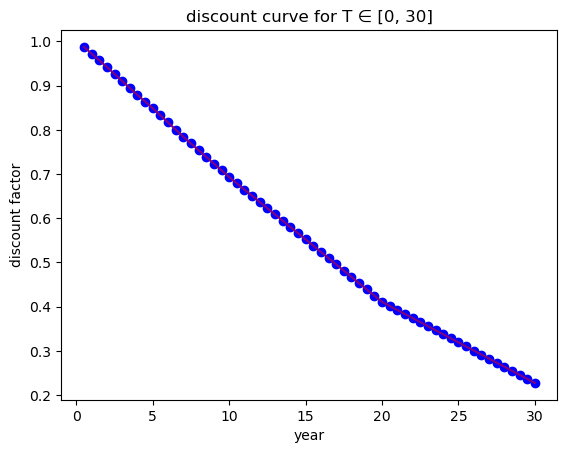

In [29]:
plt.plot(df_IR["year"],list_disf,color="purple")

for i in range(len(df_disf_IR)):
    plt.scatter(df_disf_IR["year"][i],df_disf_IR["Discount factor"][i], label='Points', color='blue', marker='o')
plt.xlabel('year')
plt.ylabel('discount factor')
plt.title('discount curve for T ∈ [0, 30]')

plt.show()

## OIS 还妹有搞

In [30]:
df_OIS =  pd.read_excel("IR Data.xlsx",sheet_name = "OIS") 
df_OIS

,Tenor,Product,Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,6m,OIS,0.00250,NaN,Day Count Convention,30/360
1,1y,OIS,0.00300,NaN,O/N Leg Frequency,Daily
2,2y,OIS,0.00325,NaN,Fixed Leg Frequency,Annual
3,3y,OIS,0.00335,NaN,NaN,NaN
4,4y,OIS,0.00350,NaN,NaN,NaN
5,5y,OIS,0.00360,NaN,NaN,NaN
6,7y,OIS,0.00400,NaN,NaN,NaN
7,10y,OIS,0.00450,NaN,NaN,NaN
8,15y,OIS,0.00500,NaN,NaN,NaN
9,20y,OIS,0.00525,NaN,NaN,NaN


In [31]:
df_OIS['year'] = 0
df_OIS['year'][0] = 0.5

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9700\2013631360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OIS['year'][0] = 0.5
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9700\2013631360.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_OIS['year'][0] = 0.5


In [32]:
df_OIS['year'][1:] = df_OIS['Tenor'][1:].str.extract(r'(\d+)y', expand=False).astype(int)
df_OIS

,Tenor,Product,Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5,year
0,6m,OIS,0.00250,NaN,Day Count Convention,30/360,0.5
1,1y,OIS,0.00300,NaN,O/N Leg Frequency,Daily,1.0
2,2y,OIS,0.00325,NaN,Fixed Leg Frequency,Annual,2.0
3,3y,OIS,0.00335,NaN,NaN,NaN,3.0
4,4y,OIS,0.00350,NaN,NaN,NaN,4.0
5,5y,OIS,0.00360,NaN,NaN,NaN,5.0
6,7y,OIS,0.00400,NaN,NaN,NaN,7.0
7,10y,OIS,0.00450,NaN,NaN,NaN,10.0
8,15y,OIS,0.00500,NaN,NaN,NaN,15.0
9,20y,OIS,0.00525,NaN,NaN,NaN,20.0


In [35]:
list_disf_ois = []
for i in range(len(df_OIS['year'])):
    list_disf_ois.append(discount_factor(df_OIS["Rate"][i],df_OIS["year"][i],1))
df_OIS["Discount factor"] = list_disf_ois
df_OIS

,Tenor,Product,Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5,year,Discount factor
0,6m,OIS,0.00250,NaN,Day Count Convention,30/360,0.5,0.998752
1,1y,OIS,0.00300,NaN,O/N Leg Frequency,Daily,1.0,0.997009
2,2y,OIS,0.00325,NaN,Fixed Leg Frequency,Annual,2.0,0.993532
3,3y,OIS,0.00335,NaN,NaN,NaN,3.0,0.990017
4,4y,OIS,0.00350,NaN,NaN,NaN,4.0,0.986122
5,5y,OIS,0.00360,NaN,NaN,NaN,5.0,0.982193
6,7y,OIS,0.00400,NaN,NaN,NaN,7.0,0.972443
7,10y,OIS,0.00450,NaN,NaN,NaN,10.0,0.956094
8,15y,OIS,0.00500,NaN,NaN,NaN,15.0,0.927917
9,20y,OIS,0.00525,NaN,NaN,NaN,20.0,0.900572


In [36]:
df_disf_OIS = rate_calculator(df_OIS,0.5,0.5,30)
df_disf_OIS#.head(10)#.tail(20)

,Discount factor,year
0,0.998752,0.5
1,0.997009,1.0
2,0.995270,1.5
3,0.993532,2.0
4,0.991774,2.5
5,0.990017,3.0
6,0.988069,3.5
7,0.986122,4.0
8,0.984157,4.5
9,0.982193,5.0


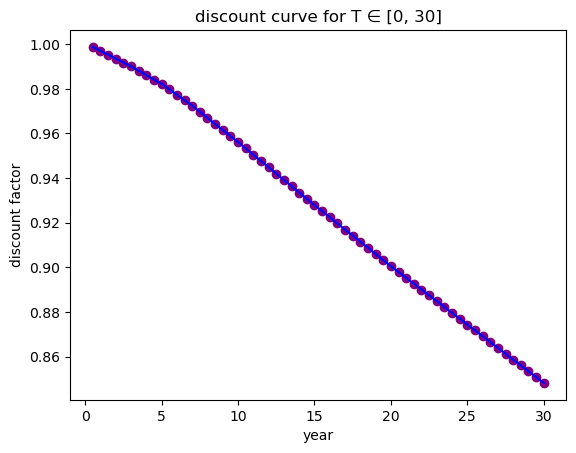

In [37]:
plt.plot(df_OIS["year"],list_disf_ois,color="BLUE")

for i in range(len(df_disf_OIS)):
    plt.scatter(df_disf_OIS["year"][i],df_disf_OIS["Discount factor"][i], label='Points', color='PURPLE', marker='o')

plt.xlabel('year')
plt.ylabel('discount factor')
plt.title('discount curve for T ∈ [0, 30]')

plt.show()